### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
tiendas = [tienda, tienda2, tienda3, tienda4]

for i , tienda in enumerate(tiendas, start = 1):
    totalFacturado = tienda['Precio'].sum()
    print(f'El total facturado en la tienda {i} es: ${totalFacturado}')

El total facturado en la tienda 1 es: $1038375700.0
El total facturado en la tienda 2 es: $1116343500.0
El total facturado en la tienda 3 es: $1098019600.0
El total facturado en la tienda 4 es: $1038375700.0


# 2. Ventas por categoría

In [ ]:
for i , tienda in enumerate(tiendas, start = 1):
    ventasPorCategoria = tienda.groupby('Categoría del Producto').size()
    maxVentas = ventasPorCategoria.max()

    categoriasMasVendidas = ventasPorCategoria[ventasPorCategoria == maxVentas]


    print(f'Las ventas más populares por categoría en la tienda {i} son: \n')

    for categoria, cantidad in categoriasMasVendidas.items():
        print(f'- {categoria}: {cantidad} ventas')
    print()

Las ventas más populares por categoría en la tienda 1 son: 

- Muebles: 480 ventas

Las ventas más populares por categoría en la tienda 2 son: 

- Muebles: 442 ventas

Las ventas más populares por categoría en la tienda 3 son: 

- Muebles: 499 ventas

Las ventas más populares por categoría en la tienda 4 son: 

- Muebles: 480 ventas



# 3. Calificación promedio de la tienda


In [ ]:
for i , tienda in enumerate(tiendas, start = 1):
    calificacionTienda = round(tienda['Calificación'].mean(),2)
    print(f'La calificación promedio de la tienda {i} es: {calificacionTienda}')

La calificación promedio de la tienda 1 es: 4.0
La calificación promedio de la tienda 2 es: 4.04
La calificación promedio de la tienda 3 es: 4.05
La calificación promedio de la tienda 4 es: 4.0


# 4. Productos más y menos vendidos

In [ ]:
def obtener_estadisticas_productos(df):
    conteo                  = df['Producto'].value_counts()
    producto_mas_vendido    = conteo.idxmax()
    cantidad_mas_vendida    = conteo.max()
    producto_menos_vendido  = conteo.idxmin()
    cantidad_menos_vendida  = conteo.min()

    return producto_mas_vendido, cantidad_mas_vendida, producto_menos_vendido, cantidad_menos_vendida

for i, tienda_df in enumerate(tiendas, start=1):
    mas_vendido, cant_mas, menos_vendido, cant_menos = obtener_estadisticas_productos(tienda_df)

    print(f"Tienda {i}")
    print(f"\t Producto más vendido: {mas_vendido} con {cant_mas} ventas")
    print(f"\t Producto menos vendido: {menos_vendido} con {cant_menos} ventas \n")


Tienda 1
	 Producto más vendido: Cama box con 62 ventas
	 Producto menos vendido: Guitarra eléctrica con 33 ventas 

Tienda 2
	 Producto más vendido: Iniciando en programación con 65 ventas
	 Producto menos vendido: Juego de mesa con 32 ventas 

Tienda 3
	 Producto más vendido: Kit de bancas con 57 ventas
	 Producto menos vendido: Bloques de construcción con 35 ventas 

Tienda 4
	 Producto más vendido: Cama box con 62 ventas
	 Producto menos vendido: Guitarra eléctrica con 33 ventas 



# 5. Envío promedio por tienda

In [ ]:
for i , tienda in enumerate(tiendas, start = 1):
    costoPromTransporte = round(tienda['Costo de envío'].mean(),1)
    print(f'La Costo de envío promedio de cada tienda {i} es: ${costoPromTransporte}')


La Costo de envío promedio de cada tienda 1 es: $23459.5
La Costo de envío promedio de cada tienda 2 es: $25216.2
La Costo de envío promedio de cada tienda 3 es: $24805.7
La Costo de envío promedio de cada tienda 4 es: $23459.5


# 6. Graficación de datos

In [ ]:
!pip install matplotlib



In [ ]:
import matplotlib.pyplot as plt


**Gráfico de barras para evaluar qué tienda tiene el costo promedio más alto de envíos:**

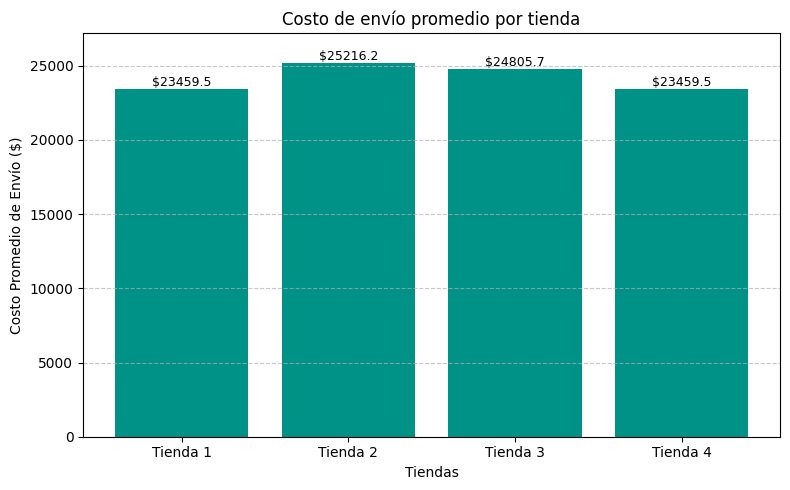

In [ ]:
from matplotlib import pyplot as plt

nomTiendas          =[]
costoPromTransporte =[]

for i, tienda in enumerate(tiendas, start=1):
    costo_promedio = round(tienda['Costo de envío'].mean(), 1)
    costoPromTransporte.append(costo_promedio)
    nomTiendas.append(f'Tienda {i}')

plt.figure(figsize=(8, 5))
barras = plt.bar(nomTiendas, costoPromTransporte, color='#009187')

for barra, valor in zip(barras, costoPromTransporte):
    plt.text(barra.get_x() + barra.get_width() / 2, valor + 0.1, f'${valor}',
             ha='center', va='bottom', fontsize=9)


plt.title('Costo de envío promedio por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Costo Promedio de Envío ($)')
plt.ylim(0, max(costoPromTransporte) + 2000)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Gráfico circular que representa el valor total facturado de cada tienda:**

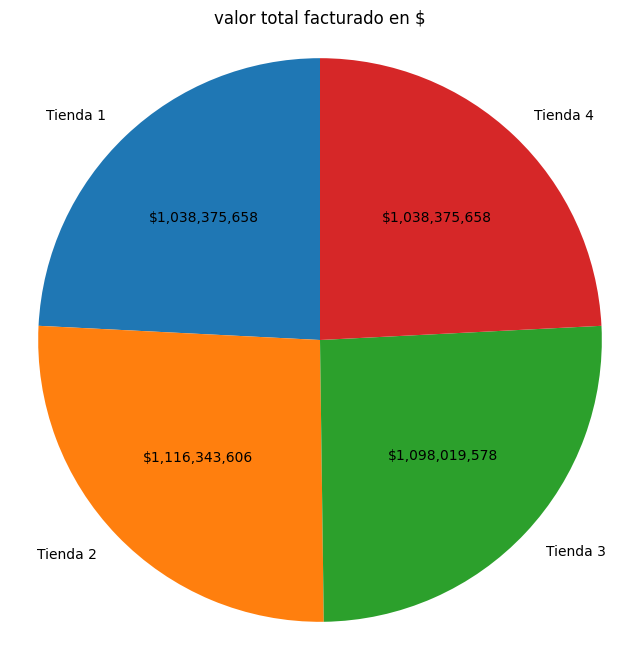

In [ ]:
nomTiendas      =[]
total_Facturado =[]

for i , tienda in enumerate(tiendas, start = 1):
    totalFacturado = tienda['Precio'].sum()
    total_Facturado.append(totalFacturado)
    nomTiendas.append(f'Tienda {i}')

def mostrarValores(valores):
    def formato(valor_pct):
      total        = sum(valores)
      valor_entero = (valor_pct / 100) * total
      return f'${valor_entero:,.0f}'

    return formato

plt.figure(figsize =(8,8))
plt.pie(
    total_Facturado,
    labels = nomTiendas,
    autopct = mostrarValores(total_Facturado),
    startangle = 90
)

plt.title('valor total facturado en $')
plt.axis('equal')
plt.show()


**Gráfico de lineas que muestra la calificación promedio de los usuarios**

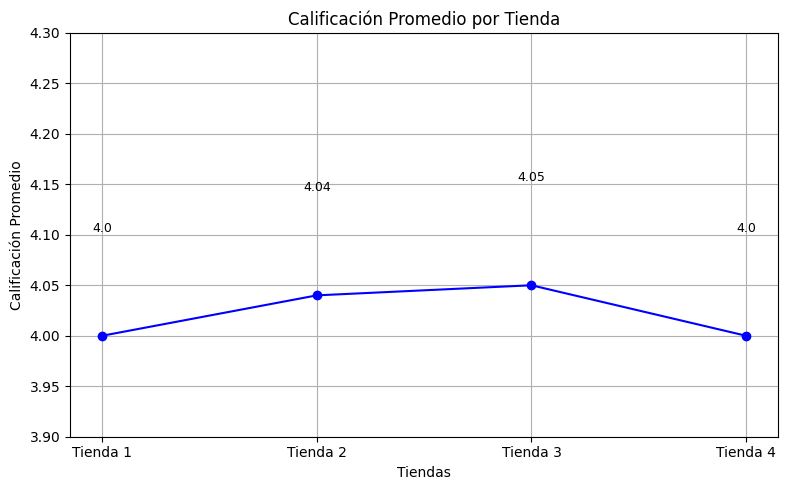

In [ ]:
nomTiendas =[]
calificProm = []

for i , tienda in enumerate(tiendas, start = 1):
    calificacionTienda = round(tienda['Calificación'].mean(),2)
    calificProm.append(calificacionTienda)
    nomTiendas.append(f'Tienda {i}')

plt.figure(figsize =(8,5))
plt.plot(nomTiendas, calificProm, marker='o', linestyle='-', color='blue')

for i, valor in enumerate(calificProm):
    plt.text(nomTiendas[i], valor + 0.1, f'{valor}', ha='center', va='bottom', fontsize=9)

plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Calificación Promedio')
plt.grid(True)
plt.ylim(3.9, 4.3)
plt.tight_layout()
plt.show()

# 7.0 Informe Final:

**Informe en el que se da una justificación sobre la tienda que por sus medidas evaluadas deberá ser vendida**

La razón de este trabajo de anaálisis de información, es principalmente para apoyar en la toma de decisiones a un cliente de nombre Juan, el cual tiene 4 tiendas y desea vender 1 de ellas para invertir en un nuevo negocio personal.

Para esto usamos el apoyo de la tecnología del análisis de datos con Python (lógica), librerías como: Pandas (análisis de la información en formato de csv) y Matplotlib (graficar el resultado de la información).

Los parámetros que se evalúan y se toman como parte fundamental para la decisión final son: Facturación total de cada tienda, categorías más populares, promedio de calificación de los usuarios, productos más y menos vendidos, costo promedio de envíos; todo lo anterior para cada tienda.

En cuanto al análisis de la información suministrada se logra concluir los siguientes aspectos:


**Análisis**

Se realiza un análisis por medio de la lectura de la información que arroja todo el análisis con ayuda de python y a su vez con la ayuda de gráficos generados con matplotlib, los cuales facilitan la interpretación de manera visual.

- En cuanto a montos facturados que representan la menor cantidad de dinero recaudado se tiene que: la tienda número 1 y 4 tienen un consolidado de: 1'038,375,658.0 $ y la tienda número 3 con un total de $1'098,019,600.0 $.

- En cuanto a las categorias más populares se tiene que son los muebles y las tiendas que menos venden muebles son: la tienda número 2 con un total de 442 ventas, seguida de la tienda número 1 y número 4 con 480 ventas.

- En cuanto a la calificación promedio de los clientes o lusuarios tenemos que: la tienda número 1 y 4 son las de más bajo puntaje promedio, con un puntaje equivalente a 4.0.

- En cuantoa  los productos más y menos vendidos se realiza un cálculo promedio entre ambos aspectos para determinar el valor medio que comparten ambos límites, para este caso la tienda 1 y 4 tienen un promedio de 47.5 y la 3 un promedio de 46 siendo el más bajo de todos

- En cuanto a el costo de envío promedio se tiene que: la tienda 1 y 4 tienen un costo promedio de $ 23,459.5 mientras que la tienda 3 $ 24,805.7, esta última ocupando el segundo puesto de las tiendas que tienen mayores gastos en envíos.


**Conclusión:**

Se concluye que la tienda número 1 es la que presenta el desempeño más bajo y es la que se recomienda vender, ya que es la que presenta una de las facturaciones más bajas, una calificación promedio reducida por parte de usuarios, un desempeño medio en la venta de productos más y menos vendidos y un bajo rendimiento en ventas de la categoría más popular muebles, no es la tienda que más invierte en costos de envío pero todo lo anterior la ponen en el puesto menos deseable con relación a las otras.

